In [ ]:
import pandas as pd
import numpy as np


### Cargar archivo

In [ ]:
#2. Cargar archivo.

file_id='#'
downloaded = drive.CreateFile({'id': file_id})
print('title: %s, mimeType: %s' % (downloaded['title'], downloaded['mimeType']))
downloaded.GetContentFile(downloaded['title'],mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

df = pd.read_excel(downloaded['title'],sheet_name='Hoja1')

title: bd_Hermosillo.xlsx, mimeType: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet


In [ ]:
df.head(5)

,HASHAFILIA,EXPEDIENTE,GPO EDAD,EDAD,SEXO,DIABETES,ESPOSA,ESPOSO,HIJA,HIJO,...,ASEGURADO,CARDIOVASCULAR,GASTROPARESIA,NEUROPATIA,NEFROPATIA,AUDITIVA,PIEL,ATROPATIA,OBESIDAD,OCULAR
0,482523,6513,13,79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,482524,6513,13,74,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,482624,20078,13,68,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,482976,16795,10,54,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,483075,23367,10,52,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Hot encoding gpo_edad

In [ ]:
df = pd.get_dummies(df, columns=['GPO EDAD'])

### Eliminar columna de hashafilia y expediente

In [ ]:
#removemos Afiliacion y expediente
df = df.drop(df.columns[[0, 1, 2, 11, 16, 18, 19, 20]], axis=1)

In [ ]:
#obtenemos las columnas del dataframe
columnas = list(df.columns.values)
columnas

['SEXO',
 'DIABETES',
 'ESPOSA',
 'ESPOSO',
 'HIJA',
 'HIJO',
 'MADRE',
 'PADRE',
 'CARDIOVASCULAR',
 'GASTROPARESIA',
 'NEUROPATIA',
 'NEFROPATIA',
 'PIEL',
 'GPO EDAD_0',
 'GPO EDAD_1',
 'GPO EDAD_2',
 'GPO EDAD_3',
 'GPO EDAD_4',
 'GPO EDAD_5',
 'GPO EDAD_6',
 'GPO EDAD_7',
 'GPO EDAD_8',
 'GPO EDAD_9',
 'GPO EDAD_10',
 'GPO EDAD_11',
 'GPO EDAD_12',
 'GPO EDAD_13']

In [ ]:
#iniciamos el proceso de Clustering
#importamos el algoritmo de K-means de Science-Kit de Python
from sklearn.cluster import KMeans

df_copy = df.copy()
#cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_copy)
labels = kmeans.labels_
y_kmeans = kmeans.predict(df_copy)

#merge the labels
df_copy['cluster'] = labels

#get centroids #omar
centroids = kmeans.cluster_centers_

#Add the column into our list
columnas.extend(['cluster'])

#Lets analyze the clusters
print (df_copy[columnas].groupby(['cluster']).mean())

             SEXO  DIABETES    ESPOSA    ESPOSO  HIJA  HIJO     MADRE  \
cluster                                                                 
0        0.000000  0.128543  0.000000  0.983627   0.0   0.0  0.000000   
1        1.000000  0.001487  0.000000  0.000000   1.0   0.0  0.000000   
2        0.000000  0.001074  0.000000  0.000000   0.0   1.0  0.000000   
3        0.994699  0.090277  0.975981  0.000000   0.0   0.0  0.020706   
4        0.993464  0.035131  0.998366  0.000000   0.0   0.0  0.000000   

            PADRE  CARDIOVASCULAR  GASTROPARESIA  ...  GPO EDAD_4  GPO EDAD_5  \
cluster                                           ...                           
0        0.010508        0.156403       0.049120  ...    0.002444    0.022727   
1        0.000000        0.013380       0.044846  ...    0.114470    0.007681   
2        0.000000        0.018523       0.046711  ...    0.066577    0.000268   
3        0.000000        0.093258       0.040914  ...    0.001822    0.052510   
4 

In [ ]:
print(kmeans.cluster_centers_)

[[-1.37667655e-14  1.28543500e-01 -7.54951657e-15  9.83626588e-01
  -6.10622664e-15 -8.52096171e-15  1.25767452e-16  1.05083089e-02
   1.56402737e-01  4.91202346e-02  2.76148583e-02  1.29521017e-02
   1.71065494e-02  6.80011603e-16  2.44379277e-04  2.44379277e-04
   2.44379277e-04  2.44379277e-03  2.27272727e-02  7.42913001e-02
   1.09237537e-01  1.32209189e-01  1.21456500e-01  1.06793744e-01
   1.13636364e-01  1.09237537e-01  2.07233627e-01]
 [ 1.00000000e+00  1.48662042e-03 -7.43849426e-15  4.52415883e-15
   1.00000000e+00 -8.27116153e-15  1.26634814e-16  3.33934269e-17
   1.33795837e-02  4.48463826e-02  3.46878097e-03  2.10604559e-02
   9.66303271e-03  1.85827552e-01  2.67096135e-01  2.24727453e-01
   2.00198216e-01  1.14469772e-01  7.68087215e-03 -8.32667268e-16
   1.38777878e-15  1.73472348e-15  2.52575738e-15  4.44089210e-16
   1.11716192e-15 -4.16333634e-16 -4.30211422e-16]
 [-1.18793864e-14  1.07382550e-03 -6.82787160e-15  4.27435864e-15
  -7.07767178e-15  1.00000000e+00  1.249

### Método del codo para deterimnar el valor de k

[70963.19938265227]
[70963.19938265227, 40747.42695178914]
[70963.19938265227, 40747.42695178914, 29194.827011089874]
[70963.19938265227, 40747.42695178914, 29194.827011089874, 21437.209283276694]
[70963.19938265227, 40747.42695178914, 29194.827011089874, 21437.209283276694, 19254.023480548552]
[70963.19938265227, 40747.42695178914, 29194.827011089874, 21437.209283276694, 19254.023480548552, 18149.82656725977]
[70963.19938265227, 40747.42695178914, 29194.827011089874, 21437.209283276694, 19254.023480548552, 18149.82656725977, 17156.259286259825]
[70963.19938265227, 40747.42695178914, 29194.827011089874, 21437.209283276694, 19254.023480548552, 18149.82656725977, 17156.259286259825, 16286.84954367832]
[70963.19938265227, 40747.42695178914, 29194.827011089874, 21437.209283276694, 19254.023480548552, 18149.82656725977, 17156.259286259825, 16286.84954367832, 15529.484300758751]


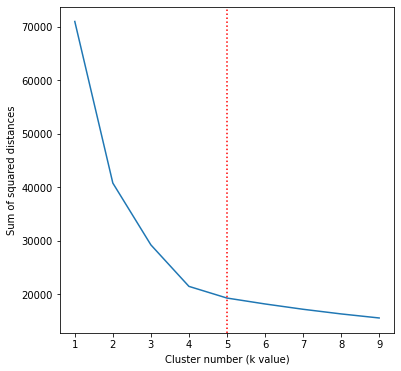

In [ ]:
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_copy)
    sse.append(km.inertia_)
    print(sse)

# Plot sse against k
codo = plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Cluster number (k value)')
plt.ylabel('Sum of squared distances');
plt.axvline(x=5, c='r', ls='dotted')
codo.show()

# Evaluación

### SSE

In [ ]:
print(kmeans.inertia_)

19254.02348054855


### Distancia Intercluster

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(kmeans.cluster_centers_)
tri_dists = dists[np.triu_indices(5, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

In [ ]:
# Distancia promedio inter-cluster (utilizando centroides)
print(avg_dist)

1.7036769928437479


### Distancia Intracluster

In [ ]:
from scipy.spatial import distance_matrix
dist_mat = pd.DataFrame(distance_matrix(df.values, centroids))

In [ ]:
#Comprobar que el calculo de dist_mat sea correcto // Solo valores True
comprobar = pd.DataFrame(dist_mat.idxmin(axis=1) == y_kmeans)
print(comprobar[0].unique())

[ True]


In [ ]:
#Las columnas denotan el número de centroide y las filas la distancia media de los puntos en un grupo.
intra = dist_mat.groupby(y_kmeans).mean()
print(intra)

          0         1         2         3         4
0  1.097451  2.137990  1.893436  2.045827  2.244281
1  2.054360  0.928818  1.969854  1.786749  2.021814
2  1.792342  1.963670  0.914976  2.043930  2.251593
3  2.032490  1.866780  2.120751  1.065490  1.517153
4  2.009608  1.846186  2.101804  1.154106  0.279009


In [ ]:
#Promedio de la diagonal principal
dist_intra = (np.trace(intra)/len(intra.columns))
print(dist_intra)

0.8571485630292806


### The Davies–Bouldin index (DBI)

In [ ]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(df_copy, labels))

0.9534322808249446


### Silhouette Coefficient

In [ ]:
from sklearn import metrics
print(metrics.silhouette_score(df_copy, labels, metric='euclidean'))

0.41393577504037404


### Calinski-Harabasz Index

In [ ]:
print(metrics.calinski_harabasz_score(df_copy, labels))

12829.924136525357


In [ ]:
#Exportar archivo
df_copy.to_csv('mpc_todasenf.csv')
!cp mpc_todasenf.csv drive/My\ Drive/

In [ ]:
freq = df_copy['cluster'].value_counts()
print(freq)

3    6037
0    4092
1    4036
2    3725
4    1224
Name: cluster, dtype: int64


In [ ]:
print(y_kmeans)

[0 3 3 ... 3 4 3]


In [ ]:
print(df_copy)

       SEXO  DIABETES  ESPOSA  ESPOSO  HIJA  HIJO  MADRE  PADRE  \
0         0         0       0       0     0     0      0      1   
1         1         0       0       0     0     0      1      0   
2         1         0       0       0     0     0      0      0   
3         1         0       1       0     0     0      0      0   
4         0         1       0       1     0     0      0      0   
...     ...       ...     ...     ...   ...   ...    ...    ...   
19109     0         0       0       0     0     1      0      0   
19110     0         0       0       1     0     0      0      0   
19111     1         0       1       0     0     0      0      0   
19112     1         0       1       0     0     0      0      0   
19113     1         0       1       0     0     0      0      0   

       CARDIOVASCULAR  GASTROPARESIA  ...  GPO EDAD_5  GPO EDAD_6  GPO EDAD_7  \
0                   0              0  ...           0           0           0   
1                   1            